In [1]:
from __future__ import annotations

import importlib
import multiprocessing

import numpy as np
import pytest

from mqt.yaqs import simulator
from mqt.yaqs.core.data_structures.networks import MPO, MPS
from mqt.yaqs.core.data_structures.noise_model import NoiseModel
from mqt.yaqs.core.data_structures.simulation_parameters import (
    AnalogSimParams,
    Observable,
    StrongSimParams,
    WeakSimParams,
)
from mqt.yaqs.core.libraries.circuit_library import create_ising_circuit
from mqt.yaqs.core.libraries.gate_library import XX, YY, ZZ, X, Z

In [ ]:
length = 5
initial_state = MPS(length, state="Neel")

H = MPO.ising(length, J=1, g=1)
site = length//2
sim_params = AnalogSimParams(
    observables=[Observable(XX(), [site, site+1]) for site in range(0, length-1)],
    elapsed_time=3,
    dt=0.1,
    num_traj=1000,
    # max_bond_dim=4,
    threshold=1e-6,
    order=2,
    sample_timesteps=True,
    show_progress=False,
)
gamma = 0.1
noise_model = NoiseModel([
    {"name": name, "sites": [i], "strength": gamma} for i in range(length) for name in ["pauli_x", "pauli_y", "pauli_z"]
])

simulator.run(initial_state, H, sim_params, noise_model, parallel=False)
# for obs in sim_params.observables:
#     print(obs.results)

0
1
2
3


/home/aaron/Github/yaqs/src/mqt/yaqs/simulator.py:658: RuntimeWarning: overflow encountered in square
  mse.append(np.abs(observable.results - old_sim_params.observables[obs_index].results)**2)


MSE: inf
4
MSE: 0.003976328472715731
5
MSE: 0.0004918022302634452
6
MSE: 0.0005224272323112545
7


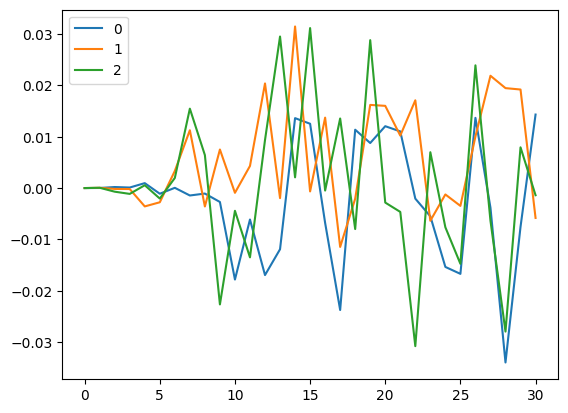

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sim_params.observables[0].results, label=0)
plt.plot(sim_params.observables[length//4].results, label=length//4)
plt.plot(sim_params.observables[length//2].results, label=length//2)
plt.legend()